In [5]:
import os
import pandas as pd
import fitz
import pickle

from matplotlib.pyplot import figure

In [2]:
pickle_scores = 'C:\\Users\\Thais\\Documents\\Python\\bcb-sentiment-analysis\\data\\minutes\\minutes_scores.pkl'

minutes_df = pd.read_pickle(pickle_scores)

<AxesSubplot:xlabel='date'>

<Figure size 1440x480 with 0 Axes>

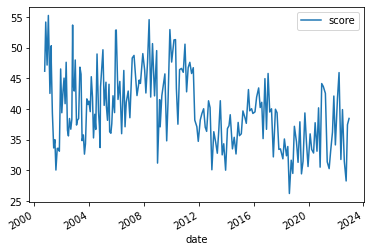

In [8]:
df = minutes_df.set_index('date')
df[['score']].iloc[8:,:].plot()

In [12]:
import plotly.express as px

fig = px.line(df[['score']].iloc[8:,:])
fig.show()

In [ ]:
def convertpdf2text(heading_ls):

    """
    Generates a pickle file with copom minutes in each row

    """
    
    ls_pdf = os.listdir('./pdf/teste') # Change path when doing the real script

    df = pd.read_excel("copom_dates.xlsx")

    #Converting pdf to string
    col_minutes = []
    for minute in ls_pdf:
        minute_number = int(minute[:-4].split("Minutes ", 1)[1])
        path_minute = './pdf/teste/'+ minute
        doc = fitz.open(path_minute)
        text = ""
        for page in doc:
            text += page.get_text()

        #Saving raw content into .txt
        text_file = open("raw_data.txt", "w")
        n = text_file.write(text.split("1. ",1)[1])
        text_file.close()

        #Deleting subheadings
        with open("raw_data.txt", "r") as file:
            mystring = file.readlines()
            for i, line in enumerate(mystring):
                for pattern in heading_ls:
                    if pattern in line:
                        mystring[i] = line.replace(pattern,"")
            text_2 = "".join(mystring)

            #Save each minute as a row in a dataframe (copom dates)
            col_minutes.append(text_2)

    # Save df as a pickle
    df['minutes'] = col_minutes
    df.to_pickle("./minutes.pkl") 

In [ ]:
convertpdf2text(heading_ls=['A) Update of economic outlook and Copom’s scenario',
                        'B) Scenarios and risk analysis ',
                        'C) Discussion about the conduct of monetary policy ', 
                        'D) Monetary policy decision ', 'bcb.gov.br'])